In [1]:
#import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)



In [3]:
train_generator = train_datagen.flow_from_directory(
    '../input/skincancer/skinlesions/train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',subset='training'
  )

Found 1401 images belonging to 3 classes.


In [4]:
test_generator = train_datagen.flow_from_directory(
     '../input/skincancer/skinlesions/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',subset='validation'
    
  )

Found 179 images belonging to 3 classes.


Found 2000 files belonging to 3 classes.


2022-10-01 21:21:49.773226: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 21:21:49.867670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 21:21:49.868455: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 21:21:49.871726: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

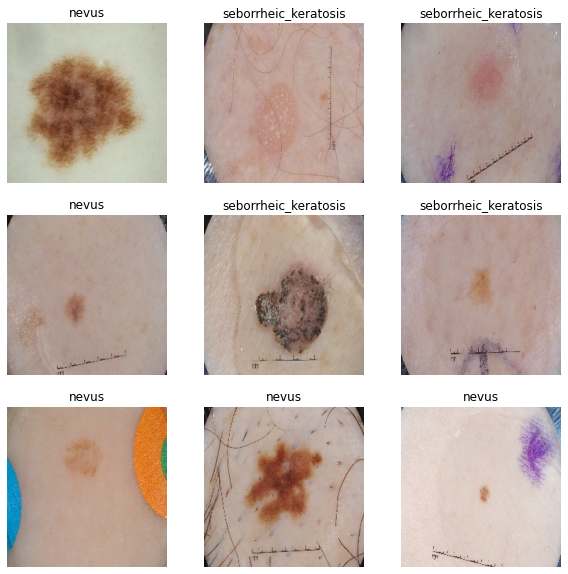

In [5]:
train_dataset = image_dataset_from_directory('../input/skincancer/skinlesions/train/',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [6]:
#call vgg model
vgg_model =  VGG19(include_top=True , weights='imagenet')
for models in vgg_model.layers:
  models.trainable= False

574726144/574710816 [==============================] - 2s 0us/step


In [7]:
vgg_model = keras.Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)
model = keras.Sequential()
for layer in vgg_model.layers:
  model.add(layer)

model.add(Dense(3, activation='softmax'))

In [8]:
model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [9]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [10]:
FIT =model.fit(train_generator,
    validation_data = test_generator, 
    callbacks = [early],
    epochs = 20)

Epoch 1/20


2022-10-01 21:22:00.683993: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


44/44 [==============================] - 41s 712ms/step - loss: 0.8945 - accuracy: 0.6859 - val_loss: 0.9010 - val_accuracy: 0.6536
Epoch 2/20
44/44 [==============================] - 23s 518ms/step - loss: 0.8533 - accuracy: 0.6845 - val_loss: 0.9178 - val_accuracy: 0.6536
Epoch 3/20
44/44 [==============================] - 23s 518ms/step - loss: 0.8636 - accuracy: 0.6795 - val_loss: 0.9163 - val_accuracy: 0.6536
Epoch 4/20
44/44 [==============================] - 23s 520ms/step - loss: 0.8530 - accuracy: 0.6788 - val_loss: 0.9286 - val_accuracy: 0.6536
Epoch 5/20
44/44 [==============================] - 22s 500ms/step - loss: 0.8439 - accuracy: 0.6717 - val_loss: 1.0031 - val_accuracy: 0.5307
Epoch 6/20
44/44 [==============================] - 23s 517ms/step - loss: 0.8187 - accuracy: 0.6859 - val_loss: 0.9074 - val_accuracy: 0.6536


In [11]:
model.evaluate(test_generator)

6/6 [==============================] - 3s 419ms/step - loss: 0.8988 - accuracy: 0.6536


[0.8988299369812012, 0.6536312699317932]

In [12]:
#classes names 
class_name = {0:"melanoma",1:"nevus" , 2 : 'seborrheic_keratosis'}


In [13]:
#predict test data
y = model.predict(test_generator)
y =  np.argmax(y,axis= 1 )
y 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [14]:
#y_true and y_pred
y_true = np.array([])
y_pred = np.array([])

i = 0
for data, labels in test_generator:
  i += 1
  y = np.argmax(model.predict(data), axis=1)
  y_true = np.append(y_true, labels)
  y_pred = np.append(y_pred, y)
  
  if i == test_generator.samples // 32 + 1:
    break

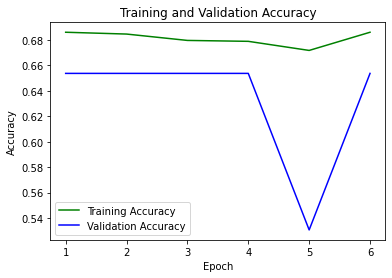

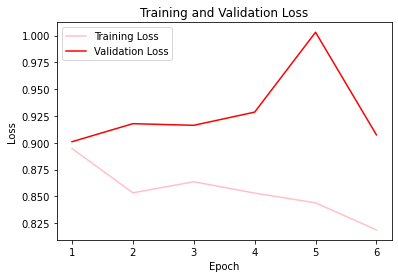

In [15]:
#plot the result
import matplotlib.pyplot as plt
acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']
loss = FIT.history['loss']
val_loss = FIT.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
model.save('vggg19_model.h5')